<a href="https://colab.research.google.com/github/eric-castillo05/emotions-wheel-nlp/blob/main/unilabel/TF_IDF_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import joblib

In [3]:
with open ('x_train.pkl', 'rb') as f:
  x_train = joblib.load(f)

with open ('x_test.pkl', 'rb') as f:
  x_test = joblib.load(f)

with open ('y_train.pkl', 'rb') as f:
  y_train = joblib.load(f)

with open ('y_test.pkl', 'rb') as f:
  y_test = joblib.load(f)

with open ('label_map.pkl', 'rb') as f:
  label_map = joblib.load(f)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [6]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
y_pred = neigh.predict(x_test)

In [8]:
from sklearn.metrics import classification_report

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80      2159
           1       0.77      0.81      0.79      1937
           2       0.85      0.88      0.87      5362
           3       0.86      0.62      0.72      1304
           4       0.90      0.84      0.87      4666
           5       0.88      0.59      0.71       572

    accuracy                           0.83     16000
   macro avg       0.83      0.78      0.79     16000
weighted avg       0.84      0.83      0.83     16000



In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

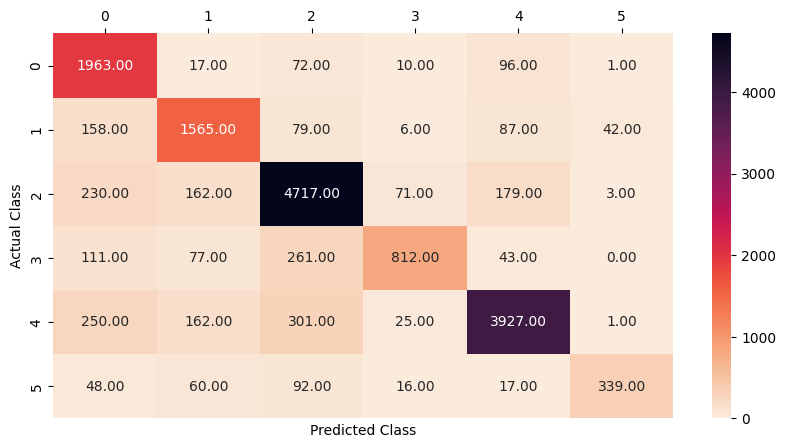

In [13]:
plt.figure(figsize = (10, 5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'rocket_r', fmt = '.2f', annot = True)
ax.set(xlabel = 'Predicted Class', ylabel = 'Actual Class')
ax.xaxis.tick_top()
plt.show()

In [14]:
from sklearn.metrics import roc_curve, auc

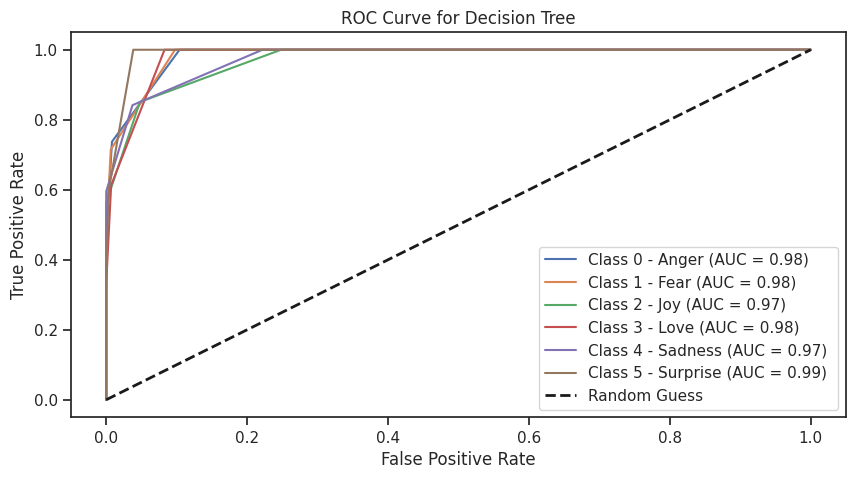

In [16]:
fpr = {}
tpr = {}
roc_auc = {}
sns.set_theme(style = 'ticks')

y_score = neigh.predict_proba(x_test)
n_classes = 6

plt.figure(figsize = (10, 5))

for i in range (n_classes):
  y_true_binary = (y_test == i).astype(int)
  y_score_binary = y_score[:, i]

  fpr[i], tpr[i], _ = roc_curve(y_true_binary, y_score_binary)
  roc_auc[i] = auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], label = f'Class {i} - {list(label_map.keys())[i].title()} (AUC = {roc_auc[i]:.2f}) ')

plt.plot([0, 1], [0, 1], 'k--', lw = 2, label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc = 'lower right')
plt.show()